In [1]:
%config Completer.use_jedi = False


### Singular value deocmposition

Let us define X as a collection of column vectors 

$$X = \begin{bmatrix}
    \vert & \vert & \vert \\
     x_1  & x_2  & x_m   \\
    \vert & \vert & \vert
\end{bmatrix}$$


We do not cover theory here, but to highlight:

$X_{nxm} = U \Sigma V^T$

where V and U are unitary matrices. i.e. $UU^T = U^{T}U = I_{n,n}$  and $VV^T = V^{T}V = I_{m,m}$ and $\Sigma$ is diagonal matrix 

$$
  \Sigma =
  \begin{bmatrix}
    \sigma_{1} & & \\
    & \ddots & \\
    & & \sigma_{m}\\
    0 & \dots & 0
  \end{bmatrix}
$$

where 
$\sigma_{1} \ge \dots  \ge \sigma_{m} \ge 0 $ are in decreasing order of magnitude.

Without much loss of information , we can truncate the U and correspoding $\Sigma$ and $V$. 

ie, 

* take first r columns of $U$,

* r rows and r columns of $\Sigma $

* and r rows of $V^T$

to get a compressed approximation of original matrix $X$

In [2]:
import matplotlib
from matplotlib.image import imread


import matplotlib.pyplot as plt
import numpy as np
import os

### Original image

A scene I caputured: Lat,long.

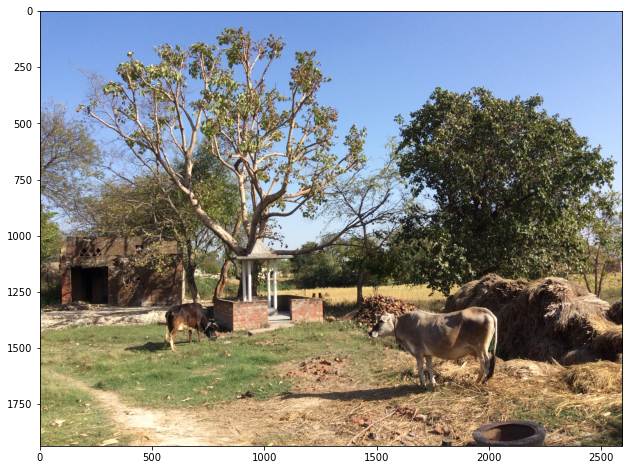

In [3]:
plt.rcParams['figure.figsize'] = [16, 8]
A = imread("village.jpeg")
img = plt.imshow(A)

## Original Grey Version

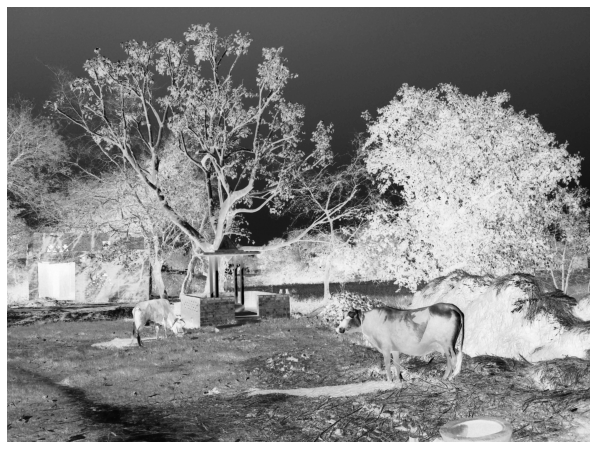

In [4]:
X = np.mean(A, -1)

img = plt.imshow(256-X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

### Compression using SVD

Here we show that as we restrict our ranks to first r (5,20,100,1000), we can see how the compression looks and information presereved. More more ranks we take, more and more clarity it comes. There will be an optimal r for most data sets where we can have the clarity, yet compressed.

Which r to choose? depends on your application and how much variation you want to retain.


In [5]:
import numpy as np

(1936, 1936)


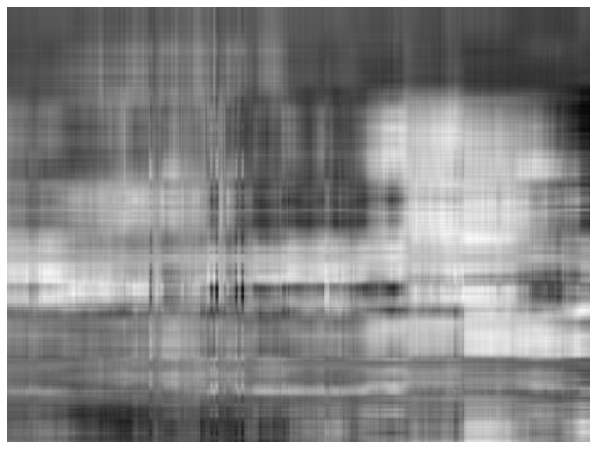

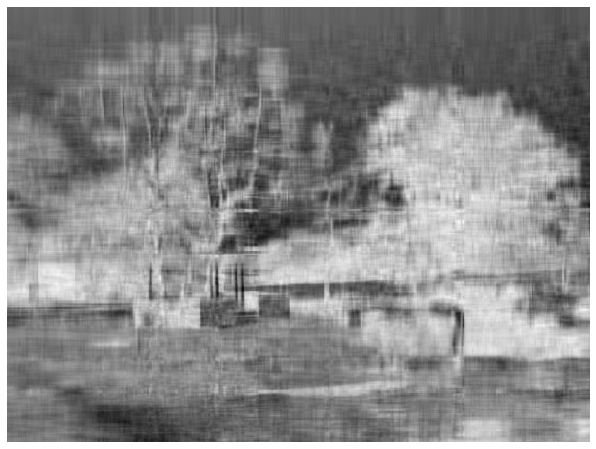

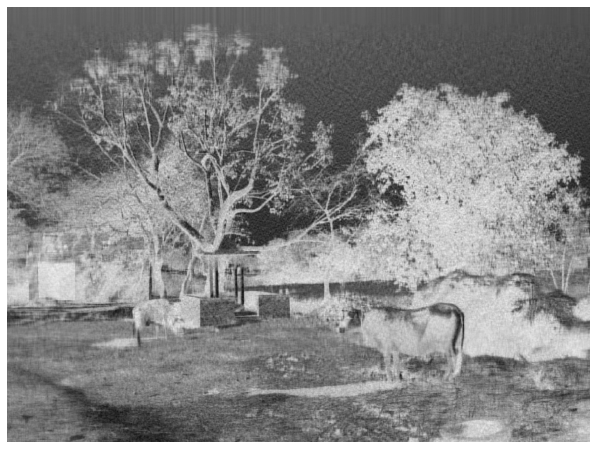

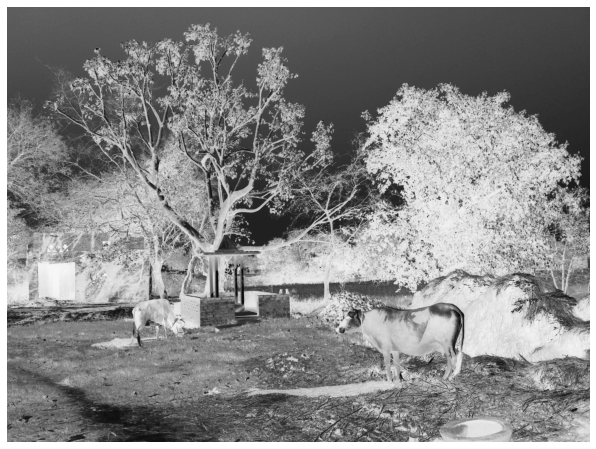

In [6]:
U, S, VT = np.linalg.svd(X, full_matrices = False)
S = np.diag(S)

print(U.shape)

j = 0

for r in (5,20,100,1000):
    # Contruct approximate image for first r principal values
    # Compression here
    x_approx = U[:, :r] @ S[0:r, :r] @ VT[:r, :]
    plt.figure(j+1)
    j = j + 1
    img = plt.imshow(256-x_approx)
    img.set_cmap('gray')
    plt.axis('off')
    plt.show()

We can see above that more and more ranks we add, we get clearer picures. 

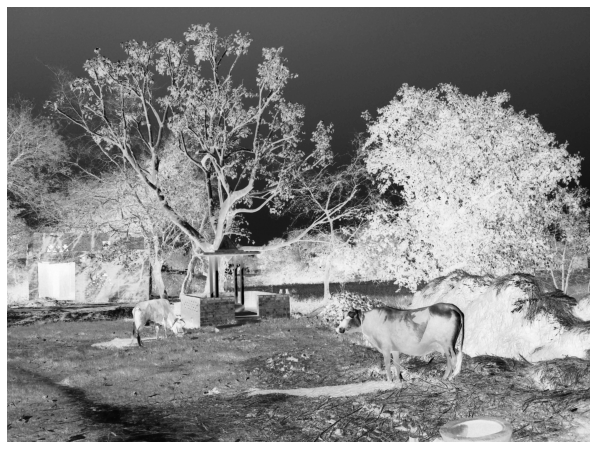

In [7]:
# We see here that we can ocnstruct back full data if we take  the full rank
r = 1936
x_approx = U[:, :r] @ S[0:r, :r] @ VT[:r, :]
plt.figure()
img = plt.imshow(256-x_approx)
img.set_cmap('gray')
plt.axis('off')
plt.show()
plt.show()

In [8]:
# We see here that we can ocnstruct back full data if we take  the full rank
print(np.sum(abs(x_approx - X)))

1.1761808334826047e-06


We can see tha we get back X if we take all columns of W

In [9]:
# We define here a matrix closeness metric (which measures loss of information when we contrruct back full matrix)
closeness = [np.sum(abs(U[:, :r] @ S[0:r, :r] @ VT[:r, :] - X)) for r in range(1,1936)]

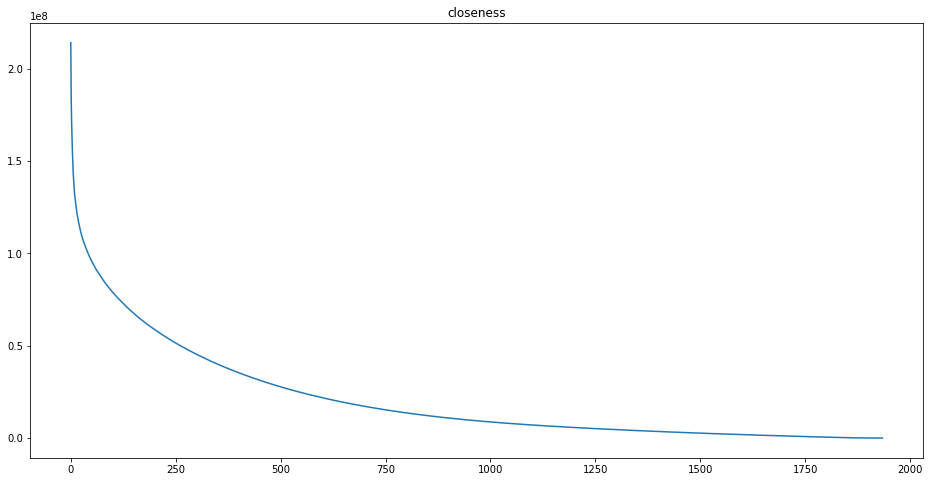

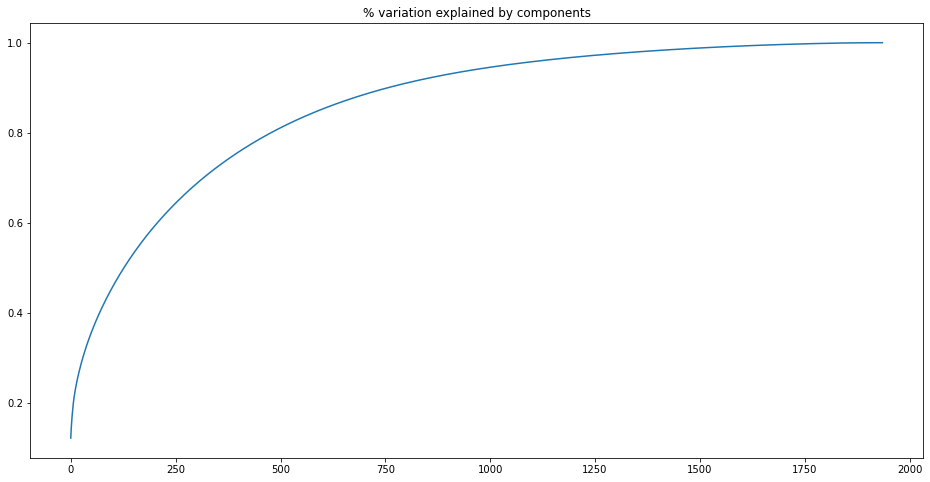

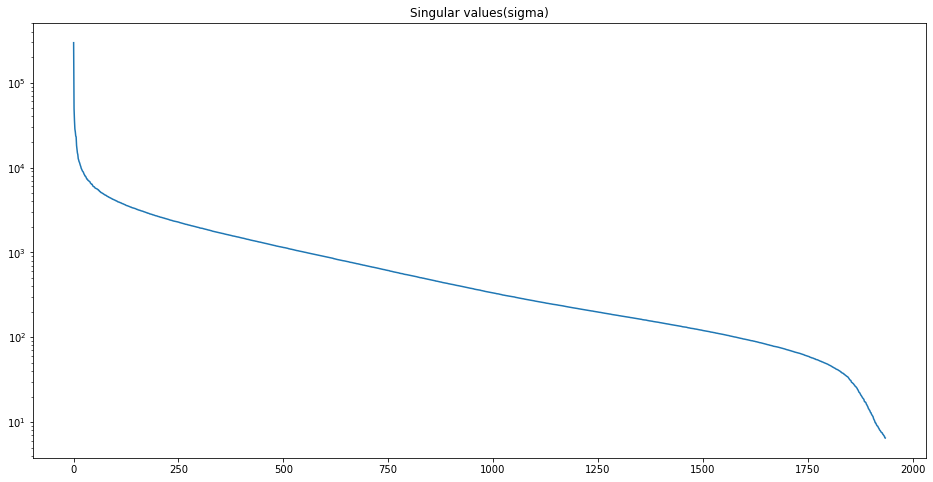

In [10]:
plt.figure(1)
plt.plot(closeness)
plt.title("closeness")
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title("% variation explained by components")
plt.show()


plt.figure(3)
plt.semilogy(np.diag(S))
plt.title("Singular values(sigma)")
plt.show()